In [2]:
# Author- Manmitha Pantangi
# Purpose - Data Cleaning and Predictive Model
# Date of creation - 28/05/2023

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the 'noth america' dataset
df = pd.read_csv("C:/Users/manmi/OneDrive/Desktop/MS/Integrated Exp/north_america.csv")
# Display the first 5 columns of the data
df.head()

,brand_name,parent_company_name,id,validated,submission_type,submission_id,year,item_description,type_product,type_material,...,continent,type_of_audit,specifics_of_audit,event_total_count,event_id,longitude_most_specific,latitude_most_specific,location_specificity,total_count,proportion
0,?,suntory,suntory,false,123Forms New,62,2020,bottle caps,food packaging,pp,...,north america,outdoor,coastal,145,123Forms New_62_2020,-117.162773,32.71742,city,16,0.110345
1,?,suntory,suntory,false,123Forms New,62,2020,broken plastic toy shovel/sand sifter,household products,o,...,north america,outdoor,coastal,145,123Forms New_62_2020,-117.162773,32.71742,city,1,0.006897
2,?,suntory,suntory,false,123Forms New,62,2020,child's sparkling sunglass arm,household products,o,...,north america,outdoor,coastal,145,123Forms New_62_2020,-117.162773,32.71742,city,1,0.006897
3,?,suntory,suntory,false,123Forms New,62,2020,cigarette butts,smoking materials,o,...,north america,outdoor,coastal,145,123Forms New_62_2020,-117.162773,32.71742,city,11,0.075862
4,?,suntory,suntory,false,123Forms New,62,2020,disposable flosser,personal care,o,...,north america,outdoor,coastal,145,123Forms New_62_2020,-117.162773,32.71742,city,1,0.006897


In [4]:
# Drop unnecessary columns
drop_col = ['id', 'validated', 'submission_type', 'submission_id', 'name_of_lead', 'is_trained', 'organization', 'event_id']

df.drop(drop_col, inplace=True, axis=1)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14919 entries, 0 to 14918
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand_name               14904 non-null  object 
 1   parent_company_name      14919 non-null  object 
 2   year                     14919 non-null  int64  
 3   item_description         10457 non-null  object 
 4   type_product             9229 non-null   object 
 5   type_material            12661 non-null  object 
 6   layer                    10571 non-null  object 
 7   volunteer                14600 non-null  float64
 8   start_of_audit           14919 non-null  object 
 9   end_of_audit             11477 non-null  object 
 10  time_spent               9405 non-null   float64
 11  city                     14919 non-null  object 
 12  province                 13712 non-null  object 
 13  country                  14919 non-null  object 
 14  continent             

In [6]:
# Impute missing values in each column

# Brand_name column
df['brand_name'] = df['brand_name'].replace('?', 'Unknown')
df['brand_name'] = df['brand_name'].fillna('Unknown')

# time_spent column
# Calculate the mean of the 'time_spent' column
mean_time = df['time_spent'].mean()
# Replace null values in the 'time_spent' column with the mean
df['time_spent'] = df['time_spent'].fillna(mean_time)

# end_of_audit column
df['end_of_audit'] = df['end_of_audit'].fillna(df['start_of_audit'])
df['start_of_audit'] = pd.to_datetime(df['start_of_audit'])
df['end_of_audit'] = pd.to_datetime(df['end_of_audit'])

# specifics_of_audit column
df['specifics_of_audit'] = df['specifics_of_audit'].fillna('other')
df['volunteer'] = df['volunteer'].fillna('Unknown')

# province column
# Define the values to be replaced and the replacement value
ca_replace = ['ca', 'ca - del monte beach', 'califonia', 'zmudowski beach', 'waddell creek beach', 'live oak beach', 'n. zmdowski']
ca_value = 'california'
nu_replace = ['nuevo leãƒâ³n', 'nuevo leon', 'nuevo leã³n']
nu_value = 'nuevo'
mi_replace = ['michoacã¡n', 'michoacãƒâ£ã‚â¡n']
mi_value = 'michoacan'

# Replace the values in the 'province' column with the replacement value
df['province'] = df['province'].replace(ca_replace, ca_value)
df['province'] = df['province'].replace(mi_replace, mi_value)
df['province'] = df['province'].replace(nu_replace, nu_value)
df['province'] = df['province'].replace('bc', 'british columbia')
df['province'] = df['province'].replace('fl', 'florida')
df['province'] = df['province'].replace('ga', 'georgia')
df['province'] = df['province'].replace('d.c.', 'dc')
df['province'] = df['province'].replace('ma', 'massachusetts')
df['province'] = df['province'].replace('ny', 'new york')
df['province'] = df['province'].replace('oh', 'ohio')
df['province'] = df['province'].replace('on', 'ontario')
df['province'] = df['province'].replace('wi', 'wisconsin')
df['province'] = df['province'].replace('roatan, bay islands', 'bay islands/ roatan')
df['province'] = df['province'].fillna('Unknown')

# city column
# Define the values to be replaced and the replacement value
nyc_replace = ['brooklyn', 'bronx', 'new york city']
nyc_value = 'new york'
chicago_replace = ['chicago - promontory point, hyde park (near soutside)', 'chicago - pilsen (southwest of the loop)',
                  'chicago - old town (central)', 'chicago - avondale (northwest of the city)', 
                   'chicago - 40th ward, western & peterson (north of the city)', 'chicago - hermosa (northwest of the city)',
                  'chicago - calumet beach (southside of chicago)']
chicago_value = 'chicago'
los_replace = ['los alamitos', 'los Ã¯Â¿Â½Ã¯Â¿Â½ngeles', 'los an']
los_value = 'los angeles'
san_replace = ['sandy bay- plasticofera', 'sandy bay reef', 'sandy bay- mangrove']
san_value = 'sandy bay'
santa_replace = ['santa cruz beaches (mostly main beach)', 'seabright sb - santa cruz']
santa_value = 'santa cruz'
sea_replace = ['seattle wa']
sea_value = 'seattle'
st_replace = ['st. petersburg fl']
st_value = 'st. petersburg'
ct_replace = ['two harbors, catalina', 'two harbors catalina']
ct_value = 'two harbors'

# Replace the values in the 'province' column with the replacement value
df['city'] = df['city'].replace(nyc_replace, nyc_value)
df['city'] = df['city'].replace(chicago_replace, chicago_value)
df['city'] = df['city'].replace(los_replace, los_value)
df['city'] = df['city'].replace(san_replace, san_value)
df['city'] = df['city'].replace(santa_replace, santa_value)
df['city'] = df['city'].replace(sea_replace, sea_value)
df['city'] = df['city'].replace(st_replace, st_value)
df['city'] = df['city'].replace(ct_replace, ct_value)

# item_description column
df['item_description'] = df['item_description'].fillna('Unknown')

# type_product column
df['type_product'] = df['type_product'].fillna('other')

# type_material column
df['type_material'] = df['type_material'].fillna('Unknown')

# layer column
df['layer'] = df['layer'].fillna('unsure')

# latitude and longitude columns
df.loc[df['city'] == 'mayaguez', 'latitude_most_specific'] = 18.2063
df.loc[df['city'] == 'mayaguez', 'longitude_most_specific'] = 67.1656
df.loc[df['city'] == 'miami', 'latitude_most_specific'] = 25.7617
df.loc[df['city'] == 'miami', 'longitude_most_specific'] = 80.1918
df.loc[df['city'] == 'garapan', 'latitude_most_specific'] = 15.2070
df.loc[df['city'] == 'garapan', 'longitude_most_specific'] = 145.7208
df.loc[df['city'] == 'san francisco', 'latitude_most_specific'] = 37.7749
df.loc[df['city'] == 'san francisco', 'longitude_most_specific'] = 122.4194

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14919 entries, 0 to 14918
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   brand_name               14919 non-null  object        
 1   parent_company_name      14919 non-null  object        
 2   year                     14919 non-null  int64         
 3   item_description         14919 non-null  object        
 4   type_product             14919 non-null  object        
 5   type_material            14919 non-null  object        
 6   layer                    14919 non-null  object        
 7   volunteer                14919 non-null  object        
 8   start_of_audit           14919 non-null  datetime64[ns]
 9   end_of_audit             14919 non-null  datetime64[ns]
 10  time_spent               14919 non-null  float64       
 11  city                     14919 non-null  object        
 12  province                 14919 n

In [9]:
# Download the cleaned dataset
file_path = 'C:/Users/manmi/OneDrive/Desktop/MS/Integrated Exp/cleaned_north_america.csv'
df.to_csv(file_path, index=False)

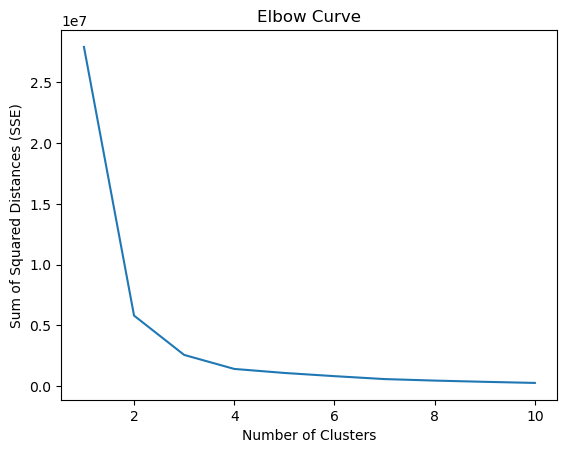

In [8]:
# Clustering Analysis
# Elbow method
# Select the relevant columns for clustering
cluster_data = df[['longitude_most_specific', 'latitude_most_specific', 'city', 'province']]

# Perform one-hot encoding for categorical variables (city and province)
cluster_data_encoded = pd.get_dummies(cluster_data)

# Create a range of possible cluster numbers
cluster_range = range(1, 11)
sse = []

# Calculate SSE for each cluster number
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cluster_data_encoded)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Curve')

# Show the plot
plt.show()

In [9]:
# Clustering Analysis
# Select the relevant columns for clustering
data = df[['latitude_most_specific', 'longitude_most_specific', 'city', 'province', 'total_count']]

# Convert city and province to numerical representations using LabelEncoder
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['province_encoded'] = label_encoder.fit_transform(df['province'])

# Select the features for clustering
features = ['latitude_most_specific', 'longitude_most_specific', 'city_encoded', 'province_encoded']

# Perform clustering using KMeans
num_clusters = 3  # Define the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df[features])

# Assign cluster labels to the data points
data['cluster_label'] = kmeans.labels_

# Calculate the total plastic pollution count in each cluster
cluster_counts = data.groupby('cluster_label')['total_count'].sum()

# Print the total plastic pollution count in each cluster
for cluster_label, count in cluster_counts.items():
    print(f"Cluster {cluster_label} - Total Plastic Pollution: {count}")

Cluster 0 - Total Plastic Pollution: 55657
Cluster 1 - Total Plastic Pollution: 52419
Cluster 2 - Total Plastic Pollution: 7610


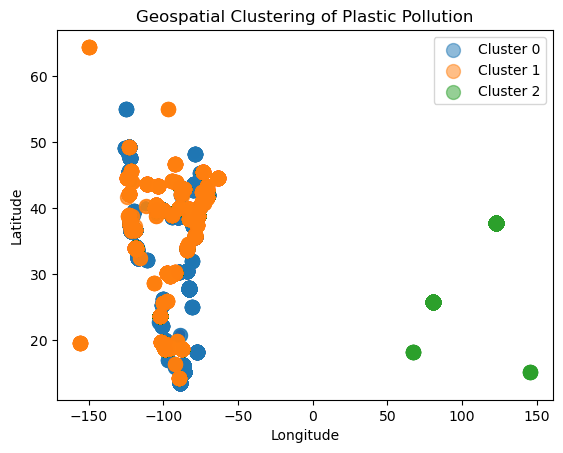

In [10]:
# Cluster Plot
# Create a scatter plot to show the clusters
plt.scatter(df['longitude_most_specific'], df['latitude_most_specific'], c=data['cluster_label'], cmap='viridis')

# Create aggregate total count circles at geocode level
for cluster_label, count in cluster_counts.items():
    cluster_data = data[data['cluster_label'] == cluster_label]
    plt.scatter(cluster_data['longitude_most_specific'], cluster_data['latitude_most_specific'], s=100, alpha=0.5,
                label=f'Cluster {cluster_label}')

# Set plot title and labels
plt.title('Geospatial Clustering of Plastic Pollution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Show the plot
plt.show()